# Simple Linear Regression
##  Author:Divya Bharti
### GRIP-The Spark Foundation
### Data Science Internship
### BATCH: DECEMBER 2020
### Problem Statement:Predict the percentage of an student based on the no. of study hours

In [115]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [92]:
#LOADING THE DATA 
df=pd.read_csv('http://bit.ly/w-data')

Data Imported Successfully

In [84]:
#FIRST FIVE ROWS OF DATA
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
#TO PRINT THE SUMMARY OF A DATAFRAME 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
#TO PRINT STATISTICAL SUMMARY OF DATASET
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours vs Scores')

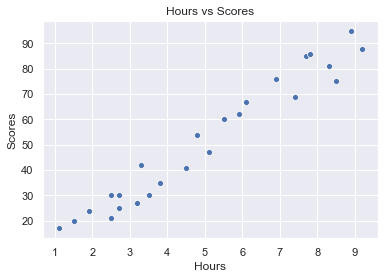

In [31]:
#TO CHECK RELATIONSHIP BETWEEN BOTH THE VARIABLES(HOURS AND SCORES)
sns.scatterplot(data=df,x="Hours",y="Scores")
plt.title("Hours vs Scores")

From the above graph ,we can clearly see that there is a positive linear relationship between the both variables(hours and scores)

### SPLITTING DATA TO TRAIN AND TEST


In [98]:
#First step is to identify which variables are our independent variables(attributes) and which variables are dependent
#Now we will divide the data into attributes and labels
x=df.iloc[:,:-1].values
y=df["Scores"].values
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [96]:
#TO PRINT SHAPE OF X-TRAIN AND X_TEST
print(x_train.shape)
print(x_test.shape)

(20, 1)
(5, 1)


### TRAINING OUR MODEL

In [88]:
#LINEAR REGRESSION MODEL
Regressor=LinearRegression()
Regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<function matplotlib.pyplot.show(*args, **kw)>

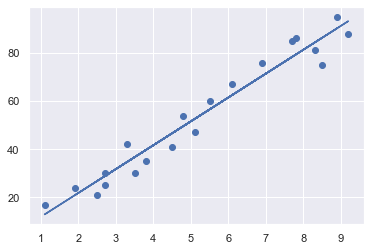

In [111]:
#REGRESSION LINE
line=Regressor.coef_*x_train+Regressor.intercept_
plt.scatter(x_train,y_train)
plt.plot(x_train,line)
plt.show

### MAKE PREDICTIONS USING OUR MODEL

In [57]:
#WILL FEED TEST SAMPLE TO OUR MODEL TO GET THE PREDICATION FOR THE SAME
y_pred=Regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [58]:
#COMPARING THE ACTUAL VALUES VS PREDICTED VALUES
data=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


as we can see the actual percentage close to the predicted percentage 

In [112]:
#WE WILL TEST FOR OWN DATA
hours=9.25
Ownpred=Regressor.predict([[hours]])
print("Number of hours:{}".format(hours))
print("Predicted score:{}".format(Ownpred[0]))

Number of hours:9.25
Predicted score:93.69173248737538


# EVALUATING THE MODEL
The final step is to evaluate the performance of our model

In [114]:
#WE WILL CALCULATE MEAN ABSOLUTE ERROR
mae=metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 4.183859899002975
